In [1]:
from finance_module import *
%load_ext autoreload
%autoreload 2
# %matplotlib inline

In [91]:
pipreqs Homepage.py

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3085849557.py, line 1)

In [79]:
pip install pipreqs



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
# LOAD DATA

TICKERS = ["AAPL","NFLX","GOOG","ORCL","MSFT","AMZN","IBM","V","CALM","PG"]
TRAIN_START_DATE = '2008-01-01'
TRAIN_END_DATE = '2018-01-01'
TEST_START_DATE = '2018-01-01'
TEST_END_DATE = '2019-01-01'
# TEST_END_DATE = '2019-8-31'


TICKERS = ["AAPL","GOOG","MSFT","AMZN"]
TRAIN_START_DATE = '2020-01-31'
TRAIN_END_DATE = '2023-01-31'
TEST_START_DATE = '2018-01-01'
TEST_END_DATE = '2019-01-01'
tm = Finance(tickers=TICKERS, start_date=TRAIN_START_DATE, end_date=TRAIN_END_DATE)

[*********************100%***********************]  4 of 4 completed


In [3]:
news_df = tm.get_stock_news('2018-01-01', '2019-01-01')

TypeError: Finance.get_stock_news() takes 1 positional argument but 3 were given

In [169]:
data = pd.read_csv('data/data.csv')
data

,id;stock;news_dt;check_day;open;close;high;low;volume;change;sentiment_summary_avg;sentiment_summary_med;sentiment_title_avg;sentiment_title_med


In [161]:
news_df["date"] = pd.to_datetime(news_df.published).dt.date

In [163]:
[["AAPL"]]

,AAPL,AMZN,CALM,GOOG,IBM,MSFT,NFLX,ORCL,PG,V
Date,,,,,,,,,,
2008-01-02,5.9064,4.8125,8.5949,17.0658,59.6687,25.6806,3.7643,18.4312,45.2764,NaN
2008-01-03,5.9091,4.7605,8.4692,17.0693,59.7884,25.7900,3.7243,18.9393,45.2764,NaN
2008-01-04,5.4581,4.4395,8.0558,16.3637,57.6397,25.0681,3.5157,18.0542,45.0948,NaN
2008-01-07,5.3850,4.4410,7.8277,16.1706,57.0241,25.2358,3.5543,18.2345,45.3891,NaN
2008-01-08,5.1913,4.3940,7.6392,15.7330,55.6220,24.3900,3.3286,17.3330,45.5081,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,41.4275,58.4180,38.3736,53.0060,110.5318,79.9803,189.9400,42.9444,78.4135,108.4213
2017-12-26,40.3765,58.8380,38.6359,52.8370,110.7710,79.8774,187.7600,43.0079,78.7114,108.7099
2017-12-27,40.3836,59.1130,38.9418,52.4685,110.9884,80.1674,186.2400,42.9625,78.3880,109.7009


In [165]:
news_df["date"].min(), news_df["date"].max() 

(datetime.date(2023, 10, 2), datetime.date(2023, 10, 22))

In [4]:
news_df

NameError: name 'news_df' is not defined

In [132]:
from plotly import graph_objects as go

In [135]:
news_df["sentiment_summary_str"] = news_df["sentiment_summary"].astype(str)

In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=news_df.date, y=news_df.sentiment_summary_str, mode='markers'))
fig.update_layout(title_text="Summary Report Graphs", showlegend=False)
fig.show()

In [157]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data frames
df1 = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y1': [10, 15, 12, 8, 9]
})

df2 = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y2': [50, 80, 45, 60, 55]
})

# Create a subplot with secondary Y axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces/series with specific colors
fig.add_trace(go.Scatter(x=tm.prices[["AAPL"]].reset_index()['Date'], y=tm.prices[["AAPL"]].reset_index()['AAPL'], mode='lines', 
                         name='y1 from df1', line=dict(color='blue')), secondary_y=False)
fig.add_trace(go.Scatter(x=news_df[news_df["stock"]=="AAPL"]['date'], y=news_df[news_df["stock"]=="AAPL"]["sentiment_summary"], mode='lines', 
                         name='y2 from df2', line=dict(color='red')), secondary_y=True)
# Update layout and axis titles
fig.update_layout(title_text="Dual Axis from Different DataFrames in Plotly")
fig.update_xaxes(title_text="X Axis")
fig.update_yaxes(title_text="Primary Y Axis from df1", secondary_y=False)
fig.update_yaxes(title_text="Secondary Y Axis from df2", secondary_y=True)

# Show figure
fig.show()


In [5]:
news_df[news_df["stock"]=="AAPL"]

NameError: name 'news_df' is not defined

In [137]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 12, 8, 9]
y2 = [50, 80, 45, 60, 55]

# Create a subplot with secondary Y axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces/series
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='y1'), secondary_y=False)  # First y-axis
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines', name='y2'), secondary_y=True)  # Second y-axis

# Update layout and axis titles
fig.update_layout(title_text="Dual Axis in Plotly")
fig.update_xaxes(title_text="X Axis")
fig.update_yaxes(title_text="Primary Y Axis", secondary_y=False)
fig.update_yaxes(title_text="Secondary Y Axis", secondary_y=True)

# Show figure
fig.show()


In [138]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 12, 8, 9]
y2 = [50, 80, 45, 60, 55]

# Create a subplot with secondary Y axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces/series with specific colors
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='y1', line=dict(color='blue')), secondary_y=False)
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines', name='y2', line=dict(color='red')), secondary_y=True)

# Update layout and axis titles
fig.update_layout(title_text="Colored Dual Axis in Plotly")
fig.update_xaxes(title_text="X Axis")
fig.update_yaxes(title_text="Primary Y Axis", secondary_y=False)
fig.update_yaxes(title_text="Secondary Y Axis", secondary_y=True)

# Show figure
fig.show()


In [116]:
tm.get_stock_news()

,guid,stock,title,summary,published,p_date,sentiment_summary,sentiment_title
0,78a7b461-b9f6-3977-9e02-ec7ae825c7c0,AAPL,Apple Supplier Foxconn Faces Chinese Investiga...,"The Taiwan-based Apple supplier, whose founder...","Sun, 22 Oct 2023 18:14:00 +0000",AAPL_2023-10-22,0.0000,0.0000
1,97235c7d-510f-3aa6-8d9a-e7ed92098ffe,AAPL,Prediction: 2 Magnificent Artificial Intellige...,"There's been a paradigm shift in AI this year,...","Sun, 22 Oct 2023 16:45:00 +0000",AAPL_2023-10-22,0.0000,0.8957
2,501dbc33-87a2-32cf-9d93-d15987146740,AAPL,China raids iPhone maker Foxconn as founder ru...,Chinese officials have raided the offices of k...,"Sun, 22 Oct 2023 16:11:07 +0000",AAPL_2023-10-22,0.0000,0.0000
3,788d9be9-22e0-4027-b0fe-8496b319b182,AAPL,Retail investors can now bet on music royaltie...,There's a new way to make money in the music i...,"Sun, 22 Oct 2023 15:02:21 +0000",AAPL_2023-10-22,0.4588,0.0772
4,6f6939c9-1222-4eda-b5c9-0a86c34c0edb,AAPL,'Quality over quantity': How Apple wants to lu...,Apple has indicated it wants sports — but not ...,"Sun, 22 Oct 2023 11:45:10 +0000",AAPL_2023-10-22,0.0000,0.0000
...,...,...,...,...,...,...,...,...
167,b33883da-1bb5-3f14-ad7a-e85ada586845,PG,S&P 500 Gains and Losses Today: Airline Stocks...,"The S&amp;P 500 tumbled 1.3% on Wednesday, Oct...","Wed, 18 Oct 2023 20:52:42 +0000",PG_2023-10-18,-0.3612,-0.0772
168,026764c9-d5b1-30a8-883f-f56362f63f6c,PG,"These Stocks Moved the Most Today: United, Mor...",United Airlines says the Israel-Hamas war will...,"Wed, 18 Oct 2023 20:24:00 +0000",PG_2023-10-18,-0.6486,0.5829
169,a9f206a6-2895-31fe-a0ac-d944f3292b47,PG,"Dow Jones Notebook: P&G Climbs On Earnings, Tr...","Procter & Gamble, Travelers were early leaders...","Wed, 18 Oct 2023 20:11:10 +0000",PG_2023-10-18,0.0000,0.0000
170,a64009a9-336c-3004-9565-d5c275965a1e,PG,"Procter & Gamble Stock Rises; Earnings Climb, ...",Procter & Gamble said profit rose 15% in its f...,"Wed, 18 Oct 2023 19:15:56 +0000",PG_2023-10-18,0.6124,0.3612


In [114]:
from StockNews import StockNews


ModuleNotFoundError: No module named 'StockNews'

In [113]:
sn = StockNews(tm.tickers, save_news=False)
news_df = sn.read_rss()

ModuleNotFoundError: No module named 'StockNews'

In [81]:
(1+tm.returns).cumprod()

,AAPL,AMZN,CALM,GOOG,IBM,MSFT,NFLX,ORCL,PG,V
Date,,,,,,,,,,
2008-01-03,1.0005,0.9892,0.9854,1.0002,1.0020,1.0043,0.9894,1.0276,1.0000,NaN
2008-01-04,0.9241,0.9225,0.9373,0.9589,0.9660,0.9761,0.9340,0.9795,0.9960,NaN
2008-01-07,0.9117,0.9228,0.9107,0.9475,0.9557,0.9827,0.9442,0.9893,1.0025,NaN
2008-01-08,0.8789,0.9130,0.8888,0.9219,0.9322,0.9497,0.8843,0.9404,1.0051,NaN
2008-01-09,0.9208,0.8854,0.8915,0.9533,0.9391,0.9779,0.8729,0.9609,1.0032,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,7.0140,12.1388,4.4647,3.1060,1.8524,3.1144,50.4584,2.3300,1.7319,8.5512
2017-12-26,6.8360,12.2261,4.4952,3.0961,1.8564,3.1104,49.8793,2.3334,1.7385,8.5740
2017-12-27,6.8372,12.2832,4.5308,3.0745,1.8601,3.1217,49.4755,2.3310,1.7313,8.6521


In [82]:
tm.annualize_rets()

AAPL   0.0092
AMZN   0.0120
CALM   0.0072
GOOG   0.0054
IBM    0.0030
MSFT   0.0054
NFLX   0.0189
ORCL   0.0040
PG     0.0026
V      0.0103
dtype: float64

In [83]:
22.5/356*30

1.8960674157303372

In [84]:
asd = tm.conduct_all_analysis()
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [104]:
from itertools import cycle

def report_graph(df_report):
    metrics_to_plot = [metric for metric in df_report.index if df_report.loc[metric].dtype != bool]

    num_rows = -(-len(metrics_to_plot) // 2)  # Ceiling division

    fig_height = 400 * num_rows  # 400 units per row
    fig = make_subplots(rows=num_rows, cols=2, subplot_titles=metrics_to_plot, vertical_spacing=0.3/num_rows, horizontal_spacing=0.2)

    
    color_pool = cycle(px.colors.qualitative.Set1)
    color_mapping = {ticker: next(color_pool) for ticker in df_report.columns}

    for i, metric in enumerate(metrics_to_plot, start=1):
        sorted_df = df_report.T.sort_values(by=metric, ascending=False)
        fig.add_trace(
            go.Bar(
                x=sorted_df.index,
                y=sorted_df[metric],
                marker_color=[color_mapping[ticker] for ticker in sorted_df.index],
                name=metric
            ),
            row=(i + 1) // 2,  
            col=1 if i % 2 == 1 else 2
        )

    fig.update_layout(title_text="Summary Report Graphs", showlegend=False, height=fig_height)
    return fig

In [105]:
asd = tm.conduct_all_analysis()

In [106]:
report_graph(asd)

In [46]:
for metric in asd.index:
    if asd.loc[metric].dtype == bool:  # skip non-numeric metrics
        continue
    
    sorted_df = asd.T.sort_values(by=metric, ascending=False)
    
    # Dynamically generate a list of colors based on the number of tickers
    colors = px.colors.qualitative.Set1[:len(sorted_df)]
    color_mapping = {ticker: colors[i] for i, ticker in enumerate(sorted_df.index)}
    
    # Create a bar plot with colors assigned dynamically
    fig = go.Figure(data=[go.Bar(
        x=sorted_df.index,
        y=sorted_df[metric],
        marker_color=[color_mapping[ticker] for ticker in sorted_df.index]
    )])
    
    fig.update_layout(title=metric, xaxis_title="Stocks", yaxis_title="Value")
    
    fig.show()

In [48]:
from plotly import graph_objects as go
colors = px.colors.qualitative.Set1[:len(asd.columns)]
color_mapping = {ticker: colors[i] for i, ticker in enumerate(asd.columns)}

# Plot each eligible metric separately
for metric in asd.index:
    if asd.loc[metric].dtype == bool:  # skip non-numeric metrics
        continue
    
    sorted_df = asd.T.sort_values(by=metric, ascending=False)
    
    # Create a bar plot with consistent colors for each ticker across all plots
    fig = go.Figure(data=[go.Bar(
        x=sorted_df.index,
        y=sorted_df[metric],
        marker_color=[color_mapping[ticker] for ticker in sorted_df.index]
    )])
    
    fig.update_layout(title=metric, xaxis_title="Stocks", yaxis_title="Value")
    
    fig.show()

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of eligible metrics to plot
metrics_to_plot = [metric for metric in asd.index if asd.loc[metric].dtype != bool]

# Calculate the number of rows required for the subplots (each row will contain 2 plots)
num_rows = -(-len(metrics_to_plot) // 2)  # Ceiling division

# Create subplots layout
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=metrics_to_plot)

# Dynamically generate a list of colors based on the number of tickers
colors = px.colors.qualitative.Set1[:len(asd.columns)]
color_mapping = {ticker: colors[i] for i, ticker in enumerate(asd.columns)}

# Populate the subplots with bar charts
for i, metric in enumerate(metrics_to_plot, start=1):
    sorted_df = asd.T.sort_values(by=metric, ascending=False)
    fig.add_trace(
        go.Bar(
            x=sorted_df.index,
            y=sorted_df[metric],
            marker_color=[color_mapping[ticker] for ticker in sorted_df.index],
            name=metric
        ),
        row=(i + 1) // 2,  # Calculate row index for the subplot
        col=1 if i % 2 == 1 else 2  # Alternate columns for subplots
    )

# Update layout
fig.update_layout(title_text="Financial Metrics for Various Tickers", showlegend=False)
fig.show()


In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of eligible metrics to plot
metrics_to_plot = [metric for metric in asd.index if asd.loc[metric].dtype != bool]

# Calculate the number of rows required for the subplots (each row will contain 2 plots)
num_rows = -(-len(metrics_to_plot) // 2)  # Ceiling division

# Create subplots layout with increased height
fig_height = 400 * num_rows  # 400 units per row
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=metrics_to_plot, vertical_spacing=0.3/num_rows)

# Dynamically generate a list of colors based on the number of tickers
colors = px.colors.qualitative.Set1[:len(asd.columns)]
color_mapping = {ticker: colors[i] for i, ticker in enumerate(asd.columns)}

# Populate the subplots with bar charts
for i, metric in enumerate(metrics_to_plot, start=1):
    sorted_df = asd.T.sort_values(by=metric, ascending=False)
    fig.add_trace(
        go.Bar(
            x=sorted_df.index,
            y=sorted_df[metric],
            marker_color=[color_mapping[ticker] for ticker in sorted_df.index],
            name=metric
        ),
        row=(i + 1) // 2,  # Calculate row index for the subplot
        col=1 if i % 2 == 1 else 2  # Alternate columns for subplots
    )

# Update layout with the calculated height
fig.update_layout(title_text="Financial Metrics for Various Tickers", showlegend=False, height=fig_height)
fig.show()


In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of eligible metrics to plot
metrics_to_plot = [metric for metric in asd.index if asd.loc[metric].dtype != bool]

# Calculate the number of rows required for the subplots (each row will contain 2 plots)
num_rows = -(-len(metrics_to_plot) // 2)  # Ceiling division

# Create subplots layout with increased height and adjusted spacing
fig_height = 400 * num_rows  # 400 units per row
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=metrics_to_plot, vertical_spacing=0.3/num_rows, horizontal_spacing=0.2)

# Dynamically generate a list of colors based on the number of tickers
colors = px.colors.qualitative.Set1[:len(asd.columns)]
color_mapping = {ticker: colors[i] for i, ticker in enumerate(asd.columns)}

# Populate the subplots with bar charts
for i, metric in enumerate(metrics_to_plot, start=1):
    sorted_df = asd.T.sort_values(by=metric, ascending=False)
    fig.add_trace(
        go.Bar(
            x=sorted_df.index,
            y=sorted_df[metric],
            marker_color=[color_mapping[ticker] for ticker in sorted_df.index],
            name=metric
        ),
        row=(i + 1) // 2,  # Calculate row index for the subplot
        col=1 if i % 2 == 1 else 2  # Alternate columns for subplots
    )

# Update layout with the calculated height
fig.update_layout(title_text="Summary Report Graphs", showlegend=False, height=fig_height)
fig.show()


In [6]:
tm.conduct_all_analysis(period=12, level=0.05, rfree_rate=0.001, modified=False)

,AAPL,AMZN,CALM,GOOG,IBM,MSFT,NFLX,ORCL,PG,V
Anualized Returns (period:12),0.0092,0.0120,0.0072,0.0054,0.0030,0.0054,0.0189,0.0040,0.0026,0.0103
Annualized Volatilities (period:12),0.0680,0.0842,0.0834,0.0640,0.0482,0.0607,0.1206,0.0610,0.0383,0.0666
Skewness (norm:0),-0.2427,1.0336,-0.5760,1.0725,0.0893,0.4681,0.7338,0.0955,-0.0302,0.3356
Kurtosis (norm:3),10.2387,15.0894,17.4446,18.1654,9.6144,14.2031,22.9442,10.0630,11.0900,11.7915
Is Normal (p_value:0.05),False,False,False,False,False,False,False,False,False,False
"Sharpe Ratio (period:12, risk-free rate:0.001)",0.1200,0.1303,0.0745,0.0680,0.0409,0.0730,0.1485,0.0496,0.0420,0.1405
Max Drawndwon,0.5988,0.6321,0.6305,0.6244,0.4429,0.5608,0.8199,0.4111,0.3879,0.5190
Semi Deviation,0.0141,0.0161,0.0172,0.0125,0.0099,0.0121,0.0232,0.0125,0.0079,0.0132
Value at Risk by Historic (percentile:0.05),-0.1191,-0.1225,-0.1212,-0.0962,-0.0692,-0.1085,-0.2468,-0.0980,-0.0660,NaN
"Value at Risk by Gaussian (percentile:0.05, modified:False)",0.0636,0.0786,0.0783,0.0602,0.0454,0.0570,0.1123,0.0575,0.0361,0.0622


In [60]:
mpt = MPT

In [61]:
cov = tm.returns.cov()
cov

,AAPL,AMZN,GOOG,MSFT
AAPL,0.0005,0.0004,0.0004,0.0004
AMZN,0.0004,0.0006,0.0004,0.0004
GOOG,0.0004,0.0004,0.0005,0.0004
MSFT,0.0004,0.0004,0.0004,0.0005


In [62]:
err = tm.annualize_rets(r=tm.returns, periods_per_year=12)
err

AAPL   0.0103
AMZN   0.0004
GOOG   0.0053
MSFT   0.0064
dtype: float64

DeltaGenerator()

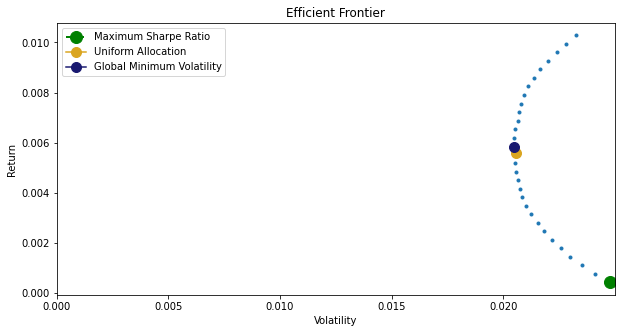

In [76]:
fig, weights_df = MPT.plot_ef(n_points=30, er=err, cov=cov, riskfree_rate=0.35)
st.pyplot(fig=fig,)

In [77]:
weights_df

,Max. Sharpe Ratio,Uniform,Glob. Min. Volatility
AAPL,0.0000,0.2500,0.2183
AMZN,1.0000,0.2500,0.1623
GOOG,0.0000,0.2500,0.3941
MSFT,0.0000,0.2500,0.2252


DeltaGenerator()

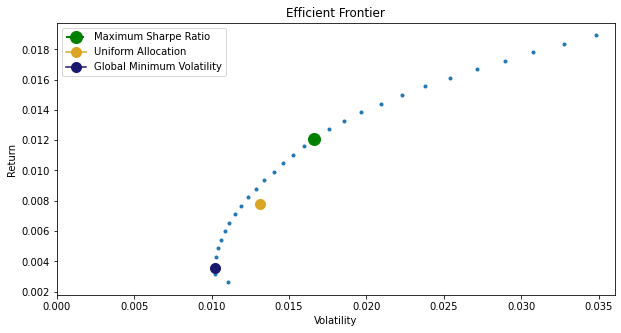

In [46]:
fig, weights_df = MPT.plot_ef(n_points=30, er=err, cov=cov, riskfree_rate=0)
st.pyplot(fig=fig,)

In [63]:
weights_df

,Max. Sharpe Ratio,Uniform,Glob. Min. Volatility
AAPL,0.1848,0.1000,0.0292
AMZN,0.1308,0.1000,0.0000
CALM,0.0944,0.1000,0.0488
GOOG,0.0000,0.1000,0.0337
IBM,0.0000,0.1000,0.2155
MSFT,0.0000,0.1000,0.0000
NFLX,0.2408,0.1000,0.0094
ORCL,0.0000,0.1000,0.0000
PG,0.0000,0.1000,0.6380
V,0.3492,0.1000,0.0255


In [27]:
weights[0]

array([0.00000000e+00, 2.99760217e-15, 0.00000000e+00, 1.44328993e-15,
       1.61114071e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.99999984e-01, 6.38378239e-16])

In [ ]:
# fin_obj = st.session_state["fin_obj"]

covv = fin_obj.returns.cov()
err = fin_obj.annualize_rets(r=fin_obj.returns, periods_per_year=12)
fig=MPT.plot_ef(n_points=30, er=err, cov=covv, show_cml=False, riskfree_rate=0, show_ew=True, show_gmv=True)
st.pyplot(fig=fig,)

In [60]:
mpt.minimize_vol()

,AAPL,AMZN,META,NFLX
Date,,,,
2012-01-04,0.005374,-0.008490,NaN,0.113649
2012-01-05,0.011102,0.000563,NaN,-0.014295
2012-01-06,0.010453,0.028152,NaN,0.088146
2012-01-09,-0.001586,-0.022178,NaN,0.137791
2012-01-10,0.003581,0.004368,NaN,-0.023936
...,...,...,...,...
2022-12-23,-0.002798,0.017425,0.007855,-0.009370
2022-12-27,-0.013878,-0.025924,-0.009827,-0.036581
2022-12-28,-0.030685,-0.014692,-0.010780,-0.025654


In [ ]:
tm.